In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib
import glob
%pylab inline
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


/home/cusp/ir729/.conda/envs/JupyterVE/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#import matplotlib.pyplot as plt
home = os.getenv('HOME') #Ilan's home directory
plumes = os.getenv('PLUMES') #plumes data

# Load the images

In [7]:
imgpath1 =  os.path.join(plumes,'outputs/tmp_01[345][0-9]_median.npy')
imgpath2 =  os.path.join(plumes,'outputs/tmp_01[345][0-9]_mindif.npy')

#print imgpath
imglist1 = sorted(glob.glob(imgpath1))
imglist2 = sorted(glob.glob(imgpath2))
        

#print imglist
nimgs = len(imglist1)

#empty array to catch read images
imgs = np.zeros((nimgs, 1300, 4096))
    
imgs_min = np.zeros((nimgs, 1300, 4096))


for i,f in enumerate(imglist1):
    #print(f)
    imgs[i] = np.load(f)[200:1500,:,:].mean(-1)

for i,f in enumerate(imglist2):
    #print(f)
    imgs_min[i] = np.load(f)[200:1500,:,:].mean(-1)

/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0130_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0131_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0132_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0133_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0134_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0135_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0136_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0137_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0138_median.npy
/projects/projects/project-uo_visible_plumes/workspace/share/plumes/outputs/tmp_0139_median.npy
/projects/projects/project-uo_visible_pl

In [21]:
## Make copies of original list for better manipulation
img_tmp = imgs.copy()
img_tmpmin = imgs_min.copy()
img_filt = imgs.copy()
imgbw = np.empty_like(img_tmp)

In [160]:
# filter the images based on log-histogram. 

from skimage import color

th = 5  #7, 10
for i in range(nimgs):
    img_filt[i][img_filt[i] < th] = 0.0
    imgbw[i] = color.rgb2gray(img_filt[i]) #set images to grayscale

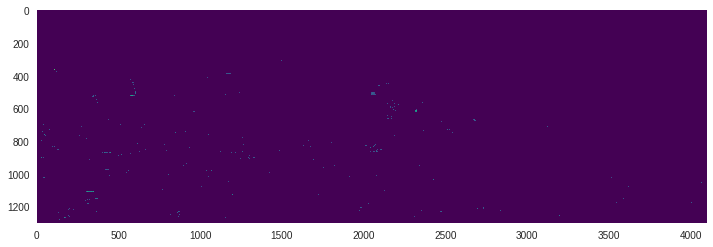

In [161]:
#First plot of image with plume as example
fig = figure(figsize = (12,10))
imshow(imgbw[15], cmap = 'viridis')
grid(False)

## Zoom into the different plumes and create histograms to see the behaviour

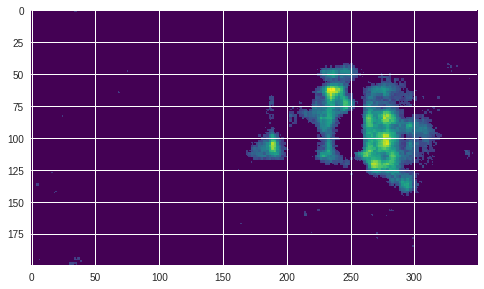

In [40]:
#Zoom into the plume to see how well defined it is after filtering
imshow(img_filt[15,600:800, 1700:2050], cmap = 'viridis')

(array([  6.56220000e+04,   0.00000000e+00,   5.51000000e+02,
          1.37000000e+03,   9.30000000e+02,   6.81000000e+02,
          4.97000000e+02,   2.16000000e+02,   9.20000000e+01,
          4.10000000e+01]),
 array([  0.  ,   3.55,   7.1 ,  10.65,  14.2 ,  17.75,  21.3 ,  24.85,
         28.4 ,  31.95,  35.5 ]),
 <a list of 10 Patch objects>)

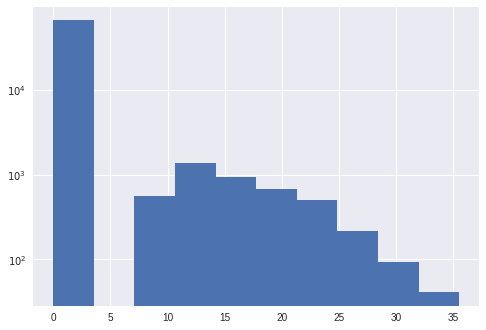

In [163]:
#Histogram of the zoomed area
hist(img_filt[15,600:800, 1700:2050].flatten(), log = True)

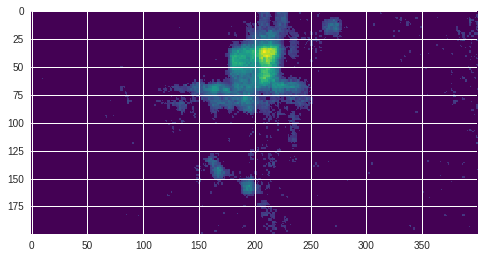

In [25]:
imshow(img_filt[16,580:780, 1800:2200], cmap = 'viridis')

(array([  7.57790000e+04,   0.00000000e+00,   1.23400000e+03,
          1.23500000e+03,   8.02000000e+02,   4.69000000e+02,
          2.63000000e+02,   1.03000000e+02,   8.90000000e+01,
          2.60000000e+01]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.]),
 <a list of 10 Patch objects>)

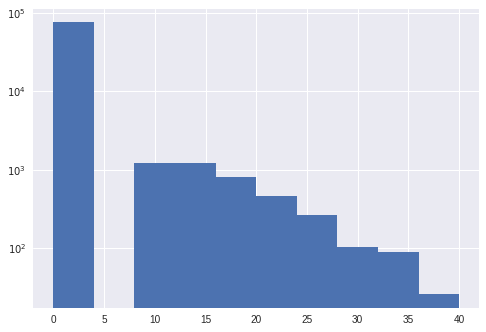

In [164]:
hist(img_filt[16,580:780, 1800:2200].flatten(), log = True)

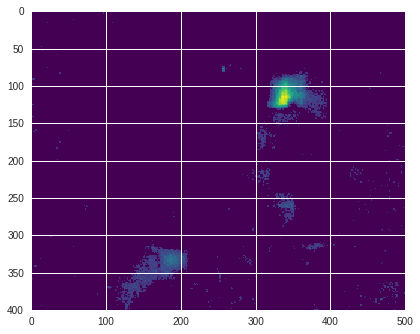

In [41]:
imshow(img_filt[17,400:800, 1700:2200], cmap = 'viridis')

(array([  1.97099000e+05,   0.00000000e+00,   1.36500000e+03,
          6.35000000e+02,   2.88000000e+02,   1.97000000e+02,
          1.59000000e+02,   9.20000000e+01,   1.02000000e+02,
          6.30000000e+01]),
 array([  0.        ,   4.36666667,   8.73333333,  13.1       ,
         17.46666667,  21.83333333,  26.2       ,  30.56666667,
         34.93333333,  39.3       ,  43.66666667]),
 <a list of 10 Patch objects>)

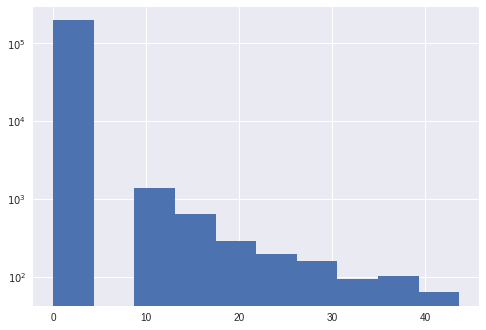

In [165]:
hist(img_filt[17,400:800, 1700:2200].flatten(), log = True)

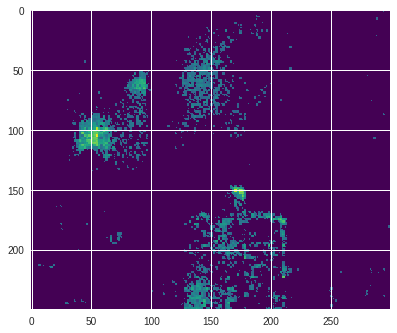

In [42]:
imshow(img_filt[18,400:650, 2000:2300], cmap = 'viridis')

(array([  7.40820000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.89000000e+02,
          1.98000000e+02,   1.10000000e+02,   1.10000000e+01,
          1.00000000e+01]),
 array([  0.        ,   1.86666667,   3.73333333,   5.6       ,
          7.46666667,   9.33333333,  11.2       ,  13.06666667,
         14.93333333,  16.8       ,  18.66666667]),
 <a list of 10 Patch objects>)

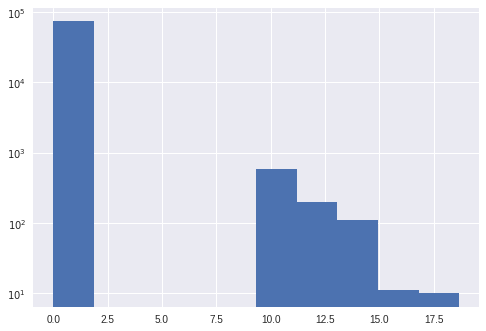

In [166]:
hist(img_filt[18,400:650, 2000:2300].flatten(), log = True)

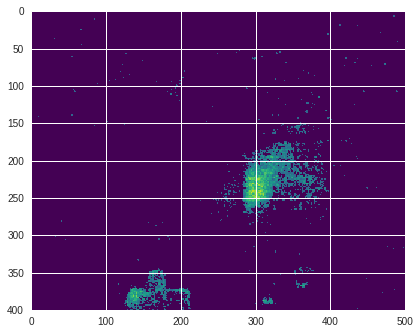

In [43]:
imshow(img_filt[19,200:600, 2000:2500], cmap = 'viridis')

(array([  1.97512000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.66000000e+02,   1.11200000e+03,
          6.30000000e+02,   3.26000000e+02,   1.36000000e+02,
          1.80000000e+01]),
 array([  0.        ,   1.91666667,   3.83333333,   5.75      ,
          7.66666667,   9.58333333,  11.5       ,  13.41666667,
         15.33333333,  17.25      ,  19.16666667]),
 <a list of 10 Patch objects>)

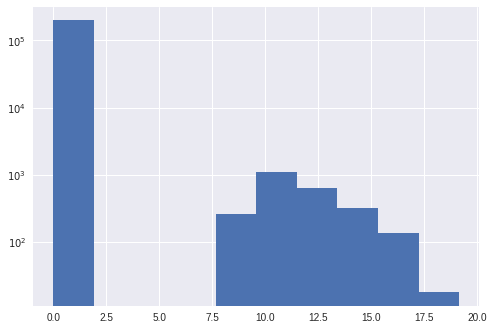

In [167]:
hist(img_filt[19,200:600, 2000:2500].flatten(), log = True)

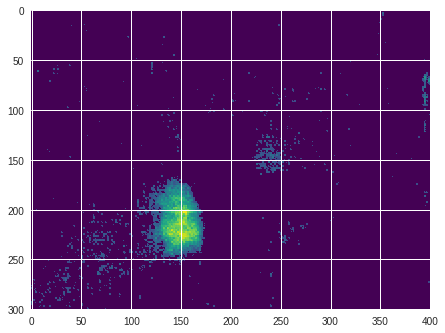

In [48]:
imshow(img_filt[20,200:500, 2300:2700], cmap = 'viridis')

(array([  1.17488000e+05,   0.00000000e+00,   0.00000000e+00,
          3.58000000e+02,   5.11000000e+02,   5.16000000e+02,
          4.15000000e+02,   4.27000000e+02,   2.30000000e+02,
          5.50000000e+01]),
 array([  0.        ,   2.68333333,   5.36666667,   8.05      ,
         10.73333333,  13.41666667,  16.1       ,  18.78333333,
         21.46666667,  24.15      ,  26.83333333]),
 <a list of 10 Patch objects>)

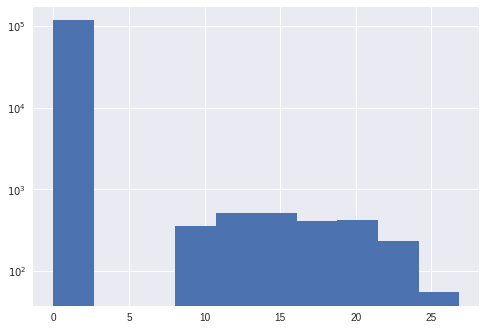

In [168]:
hist(img_filt[20,200:500, 2300:2700].flatten(), log = True)

In [ ]:
#BINS = 50#int(round(2*len(img_med[0].flatten())**(1./3.)))
#y_md = np.zeros((nimgs, BINS))
#y_mn = np.zeros((nimgs, BINS))
#x = np.zeros(BINS)
#patches = np.zeros(BINS) #third element of histogram tuple NOT USED


#for i in range(nimgs):    
    #y_md[i], x, patches = plt.hist(img_tmp[i].flatten(), bins = BINS, log = True)
    #y_mn[i] = plt.hist(imgs_min[i].flatten(), bins = BINS, log = True)[0]

In [ ]:
#ymd_log = np.log10(y_md)

In [ ]:
#ymd_log[np.isinf(ymd_log)] = 0.0

In [ ]:
#bins_cen = x[:-1] + 0.5*(x[1]-x[0])

In [ ]:
#cols = ['img%d'%(i) for i in range(nimgs)]

#median_data = pd.DataFrame(ymd_log.T, columns = cols)
#median_data.insert(0, 'X', bins_cen)

## Histogram of oriented gradients

Documentation: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html


In [223]:

from skimage.feature import hog

test, hogimg = hog(imgbw[15], orientations = 10, pixels_per_cell=(16, 16), 
                   cells_per_block=(4,4), visualise=True, block_norm='L1')

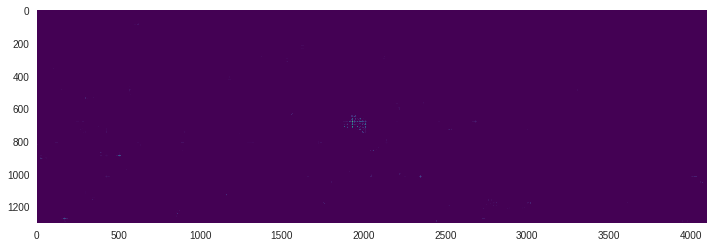

In [224]:
figure(figsize = (12, 10))
imshow(hogimg, cmap = 'viridis')
grid(False)

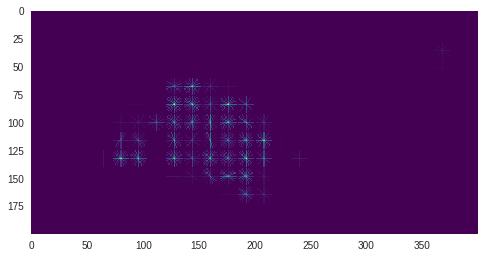

In [225]:
imshow(hogimg[580:780, 1800:2200], cmap = 'viridis')
grid(False)

In [227]:
from skimage.filters import sobel
edg1 = sobel(imgbw[15])

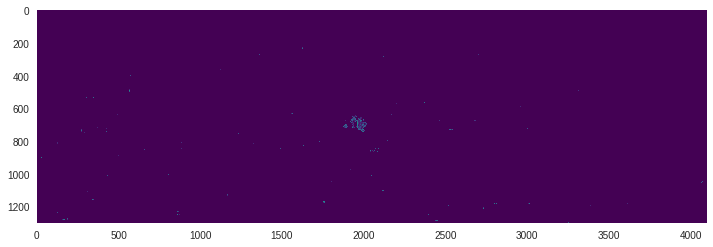

In [228]:
figure(figsize = (12, 10))
imshow(edg1, cmap = 'viridis')
grid(False)

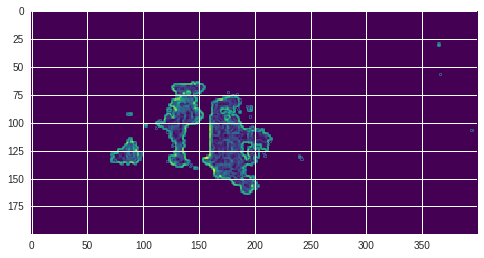

In [229]:
imshow(edg1[580:780, 1800:2200], cmap = 'viridis')

(array([  7.50240000e+04,   1.40900000e+03,   1.10400000e+03,
          6.38000000e+02,   5.63000000e+02,   6.12000000e+02,
          4.07000000e+02,   1.86000000e+02,   4.80000000e+01,
          9.00000000e+00]),
 array([  0.        ,   1.333802  ,   2.667604  ,   4.001406  ,
          5.335208  ,   6.66901   ,   8.00281201,   9.33661401,
         10.67041601,  12.00421801,  13.33802001]),
 <a list of 10 Patch objects>)

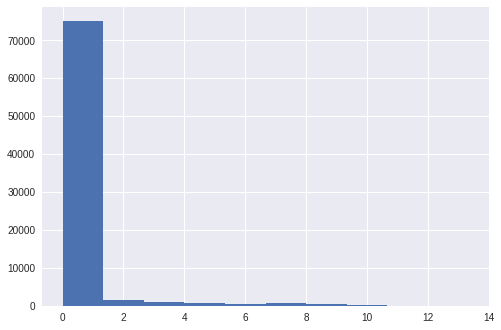

In [203]:
hist(edg1[580:780, 1800:2200].flatten())

In [ ]:
edge = np.empty_like(imgbw)
for i in range(nimgs):
    edge[i] = sobel(imgbw[i])
